In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import pymc3 as pm
import scipy.stats as stats

//anaconda/envs/python3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Long Homework #3
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, April 14th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. In this long homework, we will lead you through the process of model building in simulated real-life conditions. 

In the dataset called "sample_reviews", you'll find a fairly representative selection of Yelp reviews for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. The goal in this assignment is to build a model to help a machine classify any given restaurant (or qualities of a restaurant) as "good" or "bad" given Yelp reviews. 

Problem #1 is atypical as it does not involve any programming or (necessarily) difficult mathematics/statistics, however, answering these questions *seriously* will give you a idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model in Problem #2, which is much more technically involved.


## Problem #1: Understanding Yelp Review Data As a Human

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

**If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problemmatic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.**

The quality of a restaurant is influenced on a number of different factors such as the food, service, ambience, interior decoration. A restaurant may be considered 'good' in some and not all of these categories, and simply classifiying the resturant as 'good' does not distinguish between the different components that influence the overall review. Customers may want to know about the quality in each of these categories. For example in review02, the reviewer notes that the food is 'amaaaaaazing' but that 'the service can make you feel uncomfortable'. 


**For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.**

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
| Review | food | service | 
|-----------|----|----|
| 1         | good  |  bad  |
| 2         | good  | bad  |
| 3         |  did not comment  |  bad  |
| 4         | good  |  bad |
| 5         |  good |  good  |
| 6         |  good |  good |
| 7         | good  |  good  |
| 8         |  good | did not comment  |
| 9         | did not comment  |  bad  |
| 10         |  good | good  |
  
Each review was labelled as either 'good' 'bad or 'did not comment' for food and service. Based on these reviews it is clear that the all reviewers that tried the food recommended it as 'good' so it can be reliably inferred that the food is 'good'. Regarding the service, there were 5 reviews in which the service was 'bad', 4 reviews in which the service was 'good' and one in which the reveiwer did not specifically comment about the service. It could be concluded that the restaurant overall has 'bad' service. 

**Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's opinion on the quality of food and service problematic, if not impossible. Use examples from your dataset to support your argument.**

In some reviews the reviewer does not specifically comment about either the food or service, for example review 3 , 8 and 9 so it is not possible to extract an opinion for both food and service from each review. 

In addition the reviewers' opinion of quality of both food and service lies on a spectrum of good and bad and simply reducing a potentially 'excellent' food review to 'good' loses some of the information in the review. 

**Identify all the ways in which the task in bullet #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).**

The classification task can be broken down into the following subtasks:

1. The topics present in reviews could be identified using topic modelling such as LDA - this would help to determine which factors a restaurant should be scored on - the top 2 clusters can be identified. 

2. Determine the overall sentiment of the review (postive/negative) using sentiment analysis

3. Break down a review into sentences and determine the topic of each sentence. 

4. Given the sentiment of the review, determine the probability of each sentence being positive or negative. 

5. Aggregate the probabilies of the food sentences and service sentences in some way to get a probabiilty of the food or service being positive/negative. 

**Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review. (You are welcome to use our schema in Problem #2 to help you do this).**

Given the text of each review, the following steps can be taken to process and transform the data:

1. Assign each restaurant a unique id
2. For each restaurant
    1. Identify all reviews about the restaurant
    2. Classify each review as being positive or negative based on overall sentiment using naive bayes and the bag of words in each review 
    
$$ P(r_j + | w_1 w_n +) =  \frac{P(w_1 + |r_j + )*P(w_2 + |r_j + ).....*P(w_n + |r_j + )P(r_j +)}{P(w_1.. w_n + )} $$
    
  3. Split the review into sentences
  4. Classify each sentences as being about food or service and count the number of each category
  5. Use inverse naive bayes to determine the conditional probability of a sentence in a given review being positive given the sentiment of the overall review i.e. The marginal probability of the sentence being positive can be determined using sentiment analysis on the sentence. 
    
    $$ P(r_j + | s_1.... s_n +) =  \frac{P(s_1 + |r_j + )*P(s_2 + |r_j + ).....*P(s_n + |r_j + )P(r_j +)}{P(s_1 ..... s_n + )} $$
    
     $$ P(s_i + |r_j + ) = \frac{P(r_j + | s_i +)P(s_i +)}{P(r_j +)}$$
     
    6. after performing this probability calculation on all sentences in the review, calculate the mean and variance of the probabilities for each category. 


## Problem #2: Modeling Your Understanding

In the dataset "reviews_processed.csv", you'll find a database of Yelp reviews for a number of restaurants. These reviews have already been processed and transformed by someone who has completed the (pre) modeling process described in Problem #1. That is, imagine the dataset in "reviews_processed.csv" is the result of feeding the raw Yelp reviews through the pipeline someone build for Problem #1.

The following is a full list of columns in the dataset and their meanings:

I. Relevant to Part A and B:

  1. "review_id" - the unique identifier for each Yelp review
  2. "topic" - the subject addressed by the review (0 stands for food and 1 stands for service)
  3. "rid" - the unique identifier for each restaurant
  4. "count" - the number of sentences in a particular review on a particular topic
  5. "mean" - the probability of a sentence in a particular review on a particular topic being positive, averaged over total number of sentences in the review related to that topic.
  6. "var" - the variance of the probability of a sentence in a particular review on a particular topic being positive, taken over all sentences in the review related to that topic.
  7. (only relevant

II. Relevant (possibly) to Extra Credit:

  1. "uavg" - the average star rating given by a particular reviewer (taken across all their reviews)
  2. "stars" - the number of stars given in a particular review
  3. "max" - the max probability of a sentence in a particular review on a particular topic being positive
  4. "min" - the min probability of a sentence in a particular review on a particular topic being positive

The following schema illustrates the model of the raw data that is used to generate "reviews_processed.csv":
<img src="restuarant_model.pdf">

***Warning:*** *this is a "real" data science problem in the sense that the dataset in "reviews_processed.csv" is large. We understand that a number of you have limited computing resources, so you are encouraged but not required to use the entire dataset. If you wish you may use 10 restaurants from the dataset, as long as your choice of 10 contains a couple of restaurants with a large number of reviews and a couple with a small number of reviews.*

### Part A: Modeling

When the value in "count" is low, the "mean" value can be very skewed (refer to your answers for Problem #1 to see why this is a problem if we are interested in summarizing the reviewer's opinion on each aspect of a restaurant).

Following the [SAT prep school example discussed in lab](https://am207.github.io/2017/wiki/gelmanschoolstheory.html) (and using your answers for Problem #1), set up a Bayesian model for a reviewer $j$'s opinion of restaurant $k$'s food and service, separately. That is, you will have a model for each restaurant and each aspect (food and serivce). For restaurant $k$, you will have a model for $\{\theta_{jk}^{\text{food}}\}$ and one for $\{\theta_{jk}^{\text{service}}\}$, where $\theta_{jk}$ is the positivity of the opinion of the $j$-th reviewer regarding the $k$-th restaurant. 

**Hint:** what quantity in our data naturally corresponds to $\bar{y}_j$'s in the prep school example? How would you calculate the parameter $\sigma_j^2$ in the distribution of $\bar{y}_j$ (note that, contrary to the school example, $\sigma_j^2$ is not provided explictly in the restaurant data)?


$$ \sigma_j^2 = \frac{\sigma^2}{n_j}$$
$y_j$ corespons to the mean of the data

$$
\mu \sim \mathcal{N}(0, 5)\\
\tau \sim \text{Half-Cauchy}(0, 5)\\
\nu_j \sim \mathcal{N}(0, 1)\\
\theta_{j} \sim \mu + \nu\tau_j \\
\bar{y_{j}} \sim \mathcal{N}(\theta_{j}, \sigma_{j})
$$

where $j \in \{1, \ldots, 11417 \}$ and the
$\{ y_{j}, \sigma_{j} \}$ are given as data

In [2]:
## Load data:
reviews = pd.read_csv('./dftouse.csv')
reviews.head()

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
0,---sV8KdwfBoDw38KW_WnQ,0,VgLiSW1iGkpzIEXOgvUBEw,5,0.689383,0.558430,0.312919,3,3.285714,0.024112
1,---sV8KdwfBoDw38KW_WnQ,1,VgLiSW1iGkpzIEXOgvUBEw,5,0.816901,0.554300,0.211441,3,3.285714,0.050309
2,--0MzHNy7MVBRvZCOAeRPg,0,4gLecengX1JeGILm7DwU3w,3,0.746711,0.574416,0.360240,5,3.829268,0.038655
3,--0MzHNy7MVBRvZCOAeRPg,1,4gLecengX1JeGILm7DwU3w,6,0.848065,0.657755,0.476156,5,3.829268,0.014583
4,--2NT40xmHh9oBLumzdjhA,0,4ZZab5hinFzHtj3sE8vQWg,5,0.764218,0.601008,0.337710,2,4.181818,0.026742


In [12]:
# percent of reviews with var = 0 (count = 1 )
# reviews[reviews['var'] == 0.0].shape[0]/reviews.shape[0]
reviews = reviews[reviews['count'] > 1]
# throw out reviews with only one sentence 

In [13]:
# number of unique restarants:
unique_restaurants = reviews['rid'].unique()
num_restaurants = len(unique_restaurants)
print('num restaurants: ', num_restaurants)

num restaurants:  11417


In [94]:
restaurant

'ZEpSYuDb9BgYD-XF1mc_jg'

In [124]:
restaurant = unique_restaurants[20]
restaurant_reviews = reviews[reviews['rid'] == restaurant]
food = restaurant_reviews[restaurant_reviews['topic'] == 0]
service = restaurant_reviews[restaurant_reviews['topic'] == 1]

# food 
food_shape = food.shape[0]
sigma_j_food = np.sqrt(food['var']/food['count'])
y_j_food = food['mean']
n_j_food = food['count']

# service
service_shape = service.shape[0]
sigma_j_service = np.sqrt(service['var']/service['count'])
y_j_service = service['mean']
n_j_service = service['count']

In [46]:
with pm.Model() as restaurant_food:
    mu = pm.Normal('mu', mu=0.5, sd=0.25) # prior on a probability 
    tau = pm.HalfCauchy('tau', beta=2)
    nu = pm.Normal('nu', mu=0, sd=1, shape=food_shape)
    theta = pm.Deterministic('theta', mu + tau * nu)
    obs = pm.Normal('obs', mu=theta, sd=sigma_j_food, observed=y_j_food)

In [83]:
with pm.Model() as restaurant_service:
    mu = pm.Normal('mu', mu=0.6, sd=0.12) # prior on a probability 
    tau = pm.HalfCauchy('tau', beta=0.25)
    nu = pm.Normal('nu', mu=0, sd=1, shape=service_shape)
    theta = pm.Deterministic('theta', mu + tau * nu)
    obs = pm.Normal('obs', mu=theta, sd=sigma_j_service, observed=y_j_service)

In [70]:
with restaurant_food:
    step = pm.NUTS(target_accept=0.95)
    trace_food = pm.sample(5000, njobs=2,progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


KeyboardInterrupt: 

In [84]:
with restaurant_service:
    trace_service = pm.sample(5000, njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = 1.2626: 100%|██████████| 200000/200000 [00:12<00:00, 16285.99it/s]
Finished [100%]: Average ELBO = 1.3594
Evidence of divergence detected, inspect ELBO.
100%|██████████| 5000/5000 [00:13<00:00, 375.81it/s]


In [85]:
pm.diagnostics.effective_n(trace_food)

{'mu': 1688.0,
 'nu': array([ 6216.,  8450.,  8426.,  6310.,  8999.,  5329.]),
 'tau': 1602.0,
 'tau_log_': 2018.0,
 'theta': array([  2235.,   7680.,   4875.,   8364.,   8000.,  10000.])}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125b2c320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1232eb780>]], dtype=object)

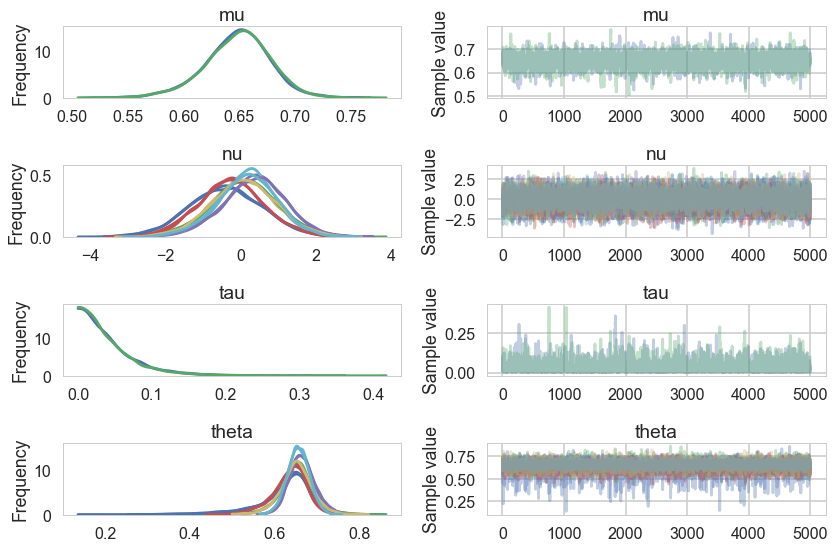

In [86]:
pm.traceplot(trace_food)

In [87]:
pm.diagnostics.effective_n(trace_service)

{'mu': 2055.0,
 'nu': array([ 4665.,  3440.,  7899.,  7802.]),
 'tau': 2152.0,
 'tau_log_': 1726.0,
 'theta': array([ 6064.,  8570.,  5023.,  6066.])}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121503208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f2e44e0>]], dtype=object)

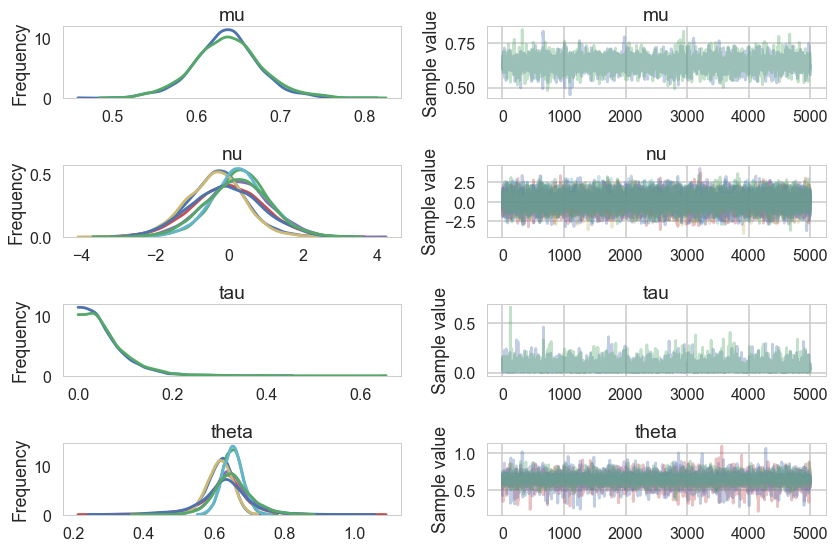

In [88]:
pm.traceplot(trace_service)

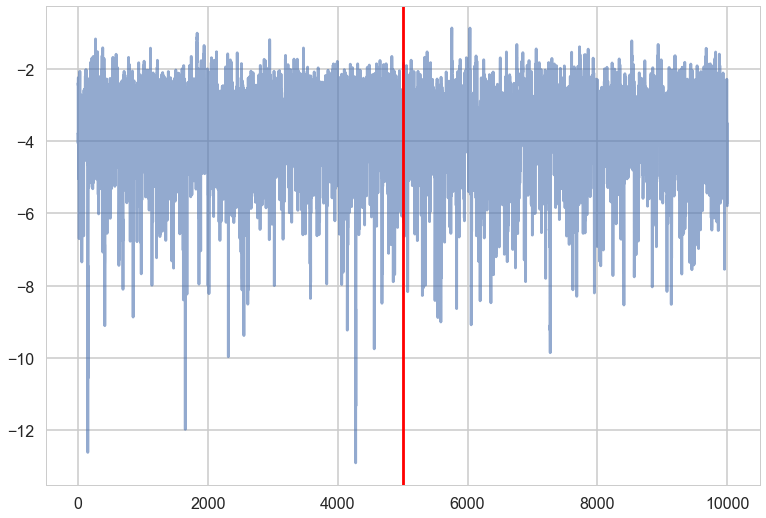

In [89]:
plt.plot(trace_food['tau_log_'], alpha=0.6)
plt.axvline(5000, color="r")

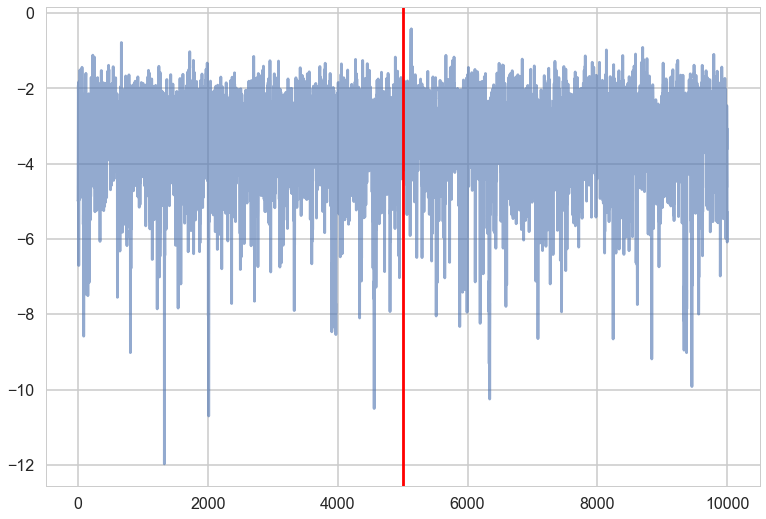

In [90]:
plt.plot(trace_service['tau_log_'], alpha=0.6)
plt.axvline(5000, color="r")

In [91]:
pm.diagnostics.gelman_rubin(trace_food), pm.diagnostics.effective_n(trace_food)

({'mu': 0.99994846304109797,
  'nu': array([ 0.99990028,  0.99990012,  1.00004221,  0.99990442,  0.99990964,
          0.99990691]),
  'tau': 1.0001219928822829,
  'tau_log_': 1.0001290857681953,
  'theta': array([ 1.00016233,  0.99994251,  0.99992231,  0.99992965,  0.99990026,
          0.99995277])},
 {'mu': 1688.0,
  'nu': array([ 6216.,  8450.,  8426.,  6310.,  8999.,  5329.]),
  'tau': 1602.0,
  'tau_log_': 2018.0,
  'theta': array([  2235.,   7680.,   4875.,   8364.,   8000.,  10000.])})

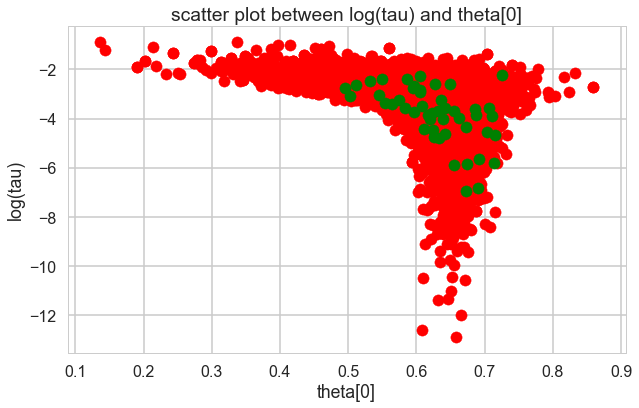

In [92]:
theta_trace = trace_food['theta']
logtau = trace_food['tau_log_']
divergent = trace_food['diverging']
theta0 = theta_trace[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[divergent == 0], logtau[divergent == 0], color='r')
plt.scatter(theta0[divergent == 1], logtau[divergent == 1], color='g')
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')
plt.show()

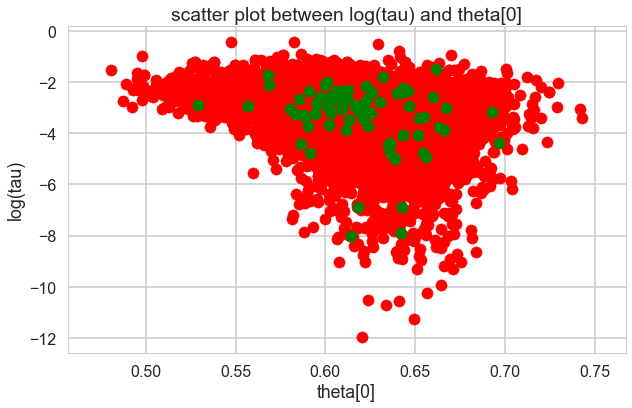

In [93]:
theta_trace = trace_service['theta']
logtau = trace_service['tau_log_']
divergent = trace_service['diverging']
theta0 = theta_trace[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[divergent == 0], logtau[divergent == 0], color='r')
plt.scatter(theta0[divergent == 1], logtau[divergent == 1], color='g')
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')
plt.show()

### Part B: Analysis for Each restaurant

Use your model to produce estimates for $\theta_{jk}$'s. Pick a few restaurants, for each aspect ("food" and "service") of each restaurant, plot your estimates for the $\theta$'s against the values in the "mean" column (corresponding to this restaurant. 

For the same restaurants, for each aspect, generate shrinkage plots as follows:

<img src="./shrinkage.png">

The $x$-axis is the posterior means, the $y$-axis is classification probability (1-cdf) or fraction of predictive samples. The colored lines are error bars. (The code to generate this plot is included in this notebook.)

Use these plots to discuss the statistical benefits of modeling each reviewer's opinion as you did in Part A, rather than approximating the reviewer opinion with the value in "mean".


In [16]:
# plot the reviewer vs prob (for food and service)

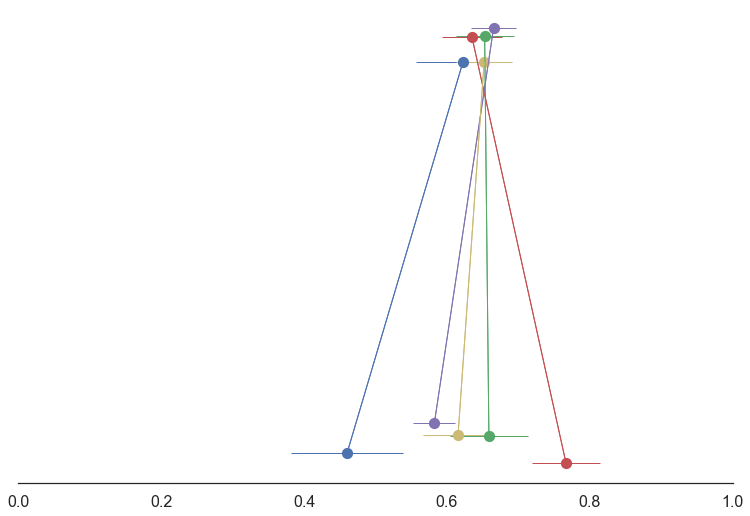

In [103]:
mean_theta_food = np.mean(trace_food['theta'], axis=0)
theta_vars_food = np.var(trace_food['theta'], axis=0)
shrinkage_plot(food['mean'], mean_theta_food, food['var'] , theta_vars_food, food['count'])

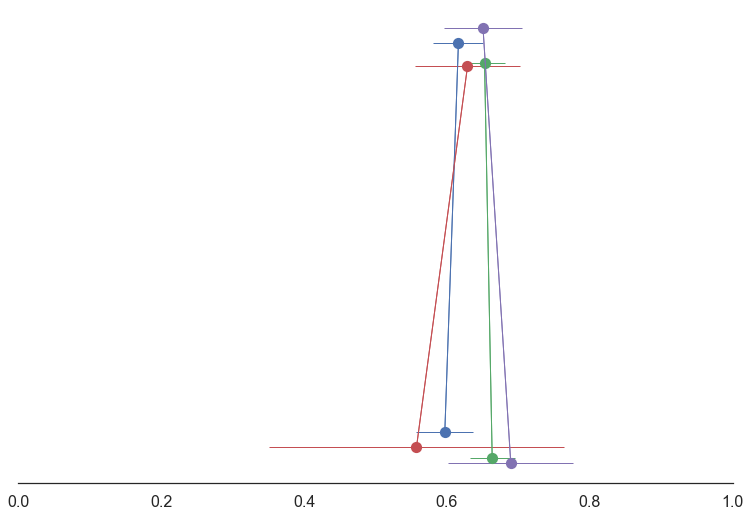

In [104]:
mean_theta_service = np.mean(trace_service['theta'], axis=0)
theta_vars_service = np.var(trace_service['theta'], axis=0)
shrinkage_plot(service['mean'], mean_theta_service, service['var'], theta_vars_service, service['count'])

In [105]:
import itertools

# fix a restaurant and an aspect (food or service)
# "means" is the array of values in the "mean" column for the restaurant and the aspect 
#         in the dataset
# "thetas" is the array of values representing your estimate of the opinions of reviewers 
#          regarding this aspect of this particular restaurant
# "mean_vars" is the array of values of the variances from the 'var' column of the dataset
# "theta_vars" is the array of values of the variances of the theta values
# "counts" is the array of values in the "count" column for the restaurant and the aspect 
#.         in the dataset

def shrinkage_plot(means, thetas, mean_vars, theta_vars, counts):
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)

    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me2, te2, c in data:
            color=next(palette)
            noise=0.04*np.random.randn()
            noise2=0.04*np.random.randn()
            plt.plot([m,t],[noise,1+noise2],'o-', color=color, lw=1)
            if me2==0:
                me2=4
            plt.errorbar([m,t],[noise,1+noise2], xerr=[np.sqrt(me2), np.sqrt(te2)], color=color,  lw=1)
        plt.yticks([])
        plt.xlim([0,1])
        sns.despine(offset=-2, trim=True, left=True)
    return plt.gca()

### Part C: Analysis Across Restaurants

Aggregate, in a simple but reasonable way, the reviewer's opinions to given a pair of overall scores for each restaurant, one for food and one for service. Rank the restaurants by food score and then by service score. Discuss the statistical weakness of ranking by these scores.

(**Hint:** what is statistically problemmatic about the way you aggregated the reviews of each restaurant to produce an overall food or service score? You've see this question addressed a number of times in previous homeworks, e.g. Homework #7 and Homework #6. This is also the same problem with summarizing a reviewer's opinion on a restaurants service and food based on what they write.)

In [45]:
mean_theta_service = np.mean(trace_service['theta'], axis=0)

In [48]:
# 4 reviwers for this restaurant - take the mean of the four
overall_service_score = np.mean(mean_theta_service)
overall_food_score = np.mean(mean_theta_food)

print('overall food ', overall_food_score)
print('overall service ', overall_service_score)

overall food  0.556951697181
overall service  0.673134468061


If there are only a few reviews per restaurant then the scores will be skewed. 
some restaurants have fewer reviews than others
thrown out reviews with only one sentence 
means are skewed 

### Extra Credit:

Propose a model, that addresses the weakness of your approach in Part C, for the overall quality of food and service for each restaurant given the $\theta$'s. Combine your model for the overall quality with your model for the $\theta$'s. Use this combined model to estimate the overall quality of food and service for each restaurant.

(**Hint:** Homework #7 is a good reference for building your model for the overall quality of food and service of these restaurants. Specifically, thinking about pooling.)


In [131]:
with pm.Model() as pg:
    a = pm.Gamma('a', 2, 0.012) # prior on a probability 
    b = pm.Gamma('b', 1, 0.05)
    theta = pm.Gamma('theta', a, b, shape=food_shape)
    y = pm.Poisson('y',mu=5*np.array(n_j_food)*theta, observed=y_j_food)

INFO (theano.gof.compilelock): Refreshing lock /Users/Nikhila/.theano/compiledir_Darwin-15.0.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock


beta binomial model (good or bad)
threshold thetas above 0.5 - turn into binary

poisson gamma (rates are 0 - 1, so poisson)

half cauchy - conditionally conjugate + weakly informative 
easy sampling 

modelling y_ is what gelman contributed ot the schools problem 

In [132]:
with pg:
    trace_pg = pm.sample(5000, njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -13.757: 100%|██████████| 200000/200000 [00:16<00:00, 11809.28it/s]
Finished [100%]: Average ELBO = -13.879
100%|██████████| 5000/5000 [00:18<00:00, 265.57it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c4617b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a9bdeb8>]], dtype=object)

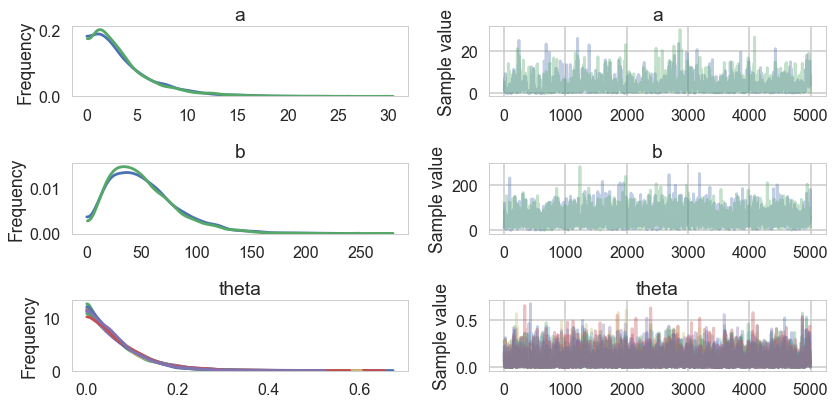

In [128]:
pm.traceplot(trace_pg)

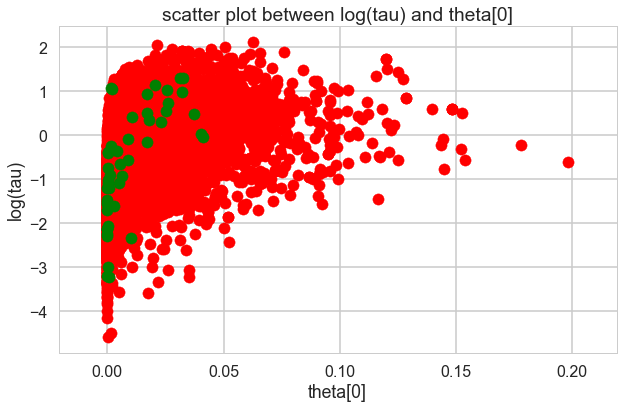

In [133]:
theta_trace = trace_pg['theta']
logtau = trace_pg['a_log_']
divergent = trace_pg['diverging']
theta0 = theta_trace[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[divergent == 0], logtau[divergent == 0], color='r')
plt.scatter(theta0[divergent == 1], logtau[divergent == 1], color='g')
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')
plt.show()

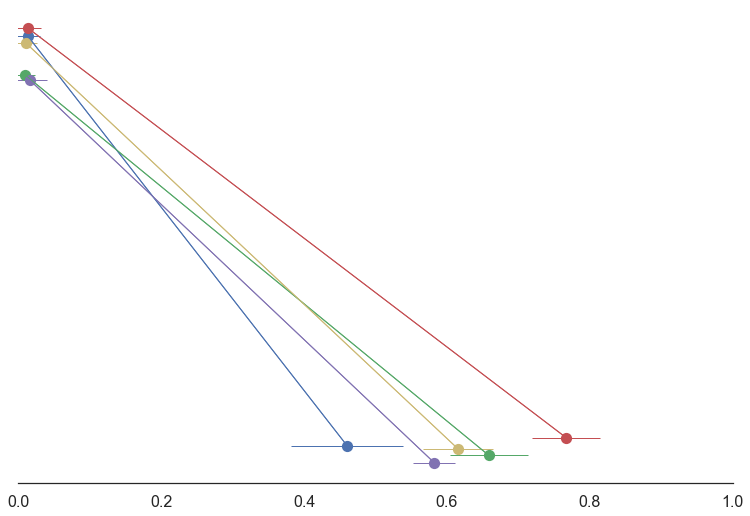

In [134]:
mean_theta_service = np.mean(trace_pg['theta'], axis=0)
theta_vars_service = np.var(trace_pg['theta'], axis=0)
shrinkage_plot(food['mean'], mean_theta_service, food['var'], theta_vars_service, food['count'])